### INTRODUCTION

**About Dataset**  

id - person's identificator  
age - person's age in years  
weight- person's weight in kilograms  
height- person's height in centimeters  
sex - person's sex  
stress - level of stress during last month (1, 2, 3 - higher values correspond to larger stress)  
doctor - relative number of visits to doctor previously (1, 2, 3 - higher values correspond to greater number of visits)  
sport - is person physically active or not (binary)  
pernicious_1 - does person have some bad habit or not (binary)  
pernicious_2 - does person have some another bad habit or not (binary)  
ubp/lbp - upper/lower blood pressure in mmHg  
insomnia - target, does person have sleep disorder or not (binary)  

This dataset consists of 70000 instances with 13 kinds of information.

### LIBRARY

In [1]:

# Standard modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing modules
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.base import TransformerMixin

# Machine Learning metrics
from sklearn.metrics import accuracy_score,classification_report, plot_confusion_matrix

# Machine Learning model
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Deployment purposes
import joblib

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

### DATA LOADING AND CLEANING

#### Loading Data Train

In [2]:
df_raw = pd.read_csv("TRAIN.csv")

In [3]:
df = df_raw.copy()
df.shape

(70000, 13)

In [4]:
# Split dataset into train and test data.
train, test = train_test_split(df, test_size = 0.2, stratify= df.insomnia)
print(f"Total data train: {train.shape[0]}")
print(f"Total data test: {test.shape[0]}")

Total data train: 56000
Total data test: 14000


In [5]:
train.head()

,id,age,weight,height,sex,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp,insomnia
34948,49919,58.039699,86.0,162,1,1,1,1,0,0,120,80,0
52464,74833,59.592060,69.0,161,2,1,1,0,0,0,160,100,1
12615,18008,59.707050,80.0,163,1,1,1,1,0,0,130,100,1
54265,77383,53.927447,56.0,162,1,1,1,1,0,0,120,80,0
1134,1574,41.897331,63.0,158,2,1,1,1,0,1,120,80,0


In [6]:
X_train = train.copy()
X_test = test.copy()

#### Find Missing Value

In [7]:
# Create function for check missing value, unique value, datatype
def show_general_table(data):
    # Find dataset misisng values.
    dataset_info = data.isnull().sum()/data.shape[0]*100
    dataset_info = dataset_info.reset_index()
    dataset_info = dataset_info.rename(columns={'index': 'column_name',0:'missing %'})
    # Find dataset types.
    types = data.dtypes.reset_index()
    types = types.rename(columns = {0:'type'})
    dataset_info['type'] = types['type']
    # Find dataset total uniques.
    uniques= data.nunique().reset_index()
    uniques = uniques.rename(columns = {0:'unique'})
    dataset_info['unique'] = uniques['unique']
    print(dataset_info)


In [8]:
# X_train info
show_general_table(X_train)

     column_name  missing %     type  unique
0             id        0.0    int64   56000
1            age        0.0  float64    7901
2         weight        0.0  float64     260
3         height        0.0    int64     102
4            sex        0.0    int64       2
5         stress        0.0    int64       3
6         doctor        0.0    int64       3
7          sport        0.0    int64       2
8   pernicious_1        0.0    int64       2
9   pernicious_2        0.0    int64       2
10           ubp        0.0    int64     147
11           lbp        0.0    int64     152
12      insomnia        0.0    int64       2


In [9]:
# X_test info
show_general_table(X_test)

     column_name  missing %     type  unique
0             id        0.0    int64   14000
1            age        0.0  float64    5886
2         weight        0.0  float64     158
3         height        0.0    int64      78
4            sex        0.0    int64       2
5         stress        0.0    int64       3
6         doctor        0.0    int64       3
7          sport        0.0    int64       2
8   pernicious_1        0.0    int64       2
9   pernicious_2        0.0    int64       2
10           ubp        0.0    int64     104
11           lbp        0.0    int64      85
12      insomnia        0.0    int64       2


Train and Test Data:
- There is no missing value found either on train data or test data.
- Data consist of 6 numerical type of data (continues) when others are categorical that encoded tobe numerical like sex, stress, doctor, sport, pernicious_1, pernicious_2, and insomnia (discrit).

#### Find Duplicate Value

In [10]:
train_duplicate_value = X_train.duplicated().sum()
test_duplicate_value = X_train.duplicated().sum()
print(f"There is {train_duplicate_value} duplicate value found on data train.")
print(f"There is {test_duplicate_value} duplicate value found on data test.")

There is 0 duplicate value found on data train.
There is 0 duplicate value found on data test.


As a result of neither missing nor duplicate value on dataset, further action is unneccessary. And we are good to go for data exploration.

### EDA

In [11]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,56000.0,49988.469429,28840.697757,0.000000,24982.750000,50050.50000,74870.750000,99999.000000
age,56000.0,53.308823,6.755674,29.563313,48.372348,53.94935,58.392882,64.889802
weight,56000.0,74.160061,14.403164,10.000000,65.000000,72.00000,82.000000,200.000000
height,56000.0,164.352339,8.169667,55.000000,159.000000,165.00000,170.000000,207.000000
sex,56000.0,1.350107,0.477008,1.000000,1.000000,1.00000,2.000000,2.000000
stress,56000.0,1.367714,0.680657,1.000000,1.000000,1.00000,2.000000,3.000000
doctor,56000.0,1.226321,0.571963,1.000000,1.000000,1.00000,1.000000,3.000000
sport,56000.0,0.803571,0.397300,0.000000,1.000000,1.00000,1.000000,1.000000
pernicious_1,56000.0,0.087589,0.282699,0.000000,0.000000,0.00000,0.000000,1.000000
pernicious_2,56000.0,0.053804,0.225632,0.000000,0.000000,0.00000,0.000000,1.000000


In this section, we will explore deeper into dataset in order to gain some insight init. Firstly, I am going to check distribution of each column.

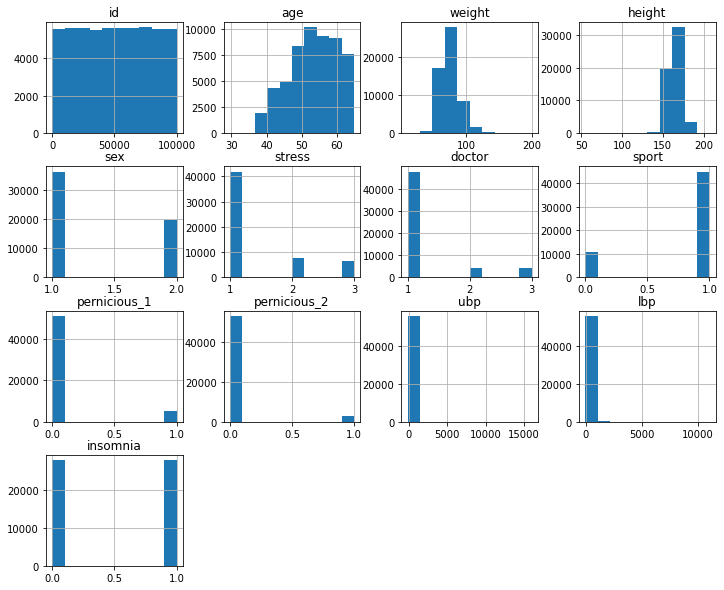

In [12]:
# Display distribution.
ax = plt.figure(figsize=(12,10))
X_train.hist(ax=ax);
plt.show(ax);

Here columns that I will do some action or manipulating on:
- id : as the description above that id is unique value of each correspond which is not have any contribution in causing someone insomnia. Therefore, id column will be better to be dropped.

In [13]:
# Drop id column.
X_train.drop('id', axis=1, inplace=True)
X_train.sample()

,age,weight,height,sex,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp,insomnia
7404,42.275154,66.0,165,1,2,1,1,0,0,110,70,0


***Handle Outlier***

Let's have a look whether there is outlier or not on all continues type data of column.

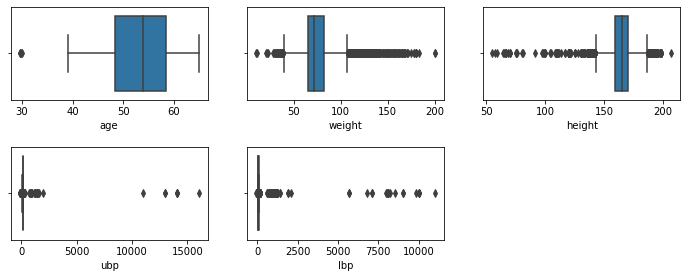

In [14]:
# Displat boxplot.
list_col = ['age','weight','height','ubp','lbp']
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=0.5)
for i, col_num in enumerate(list_col):
    ax = plt.subplot(5,3,i+1)
    sns.boxplot(x=X_train[col_num])

Handle illogical outliers on weight and height column:
- height = according to wikipedia record, the shortest people in the world is 54.6 cm height and the tallest one is 272 cm. Therefore, I will get only instances which is the height range is around 110 cm to 200 cm.
- weight = for the lower outlier I will take correspond with weight start from 30 kg only.

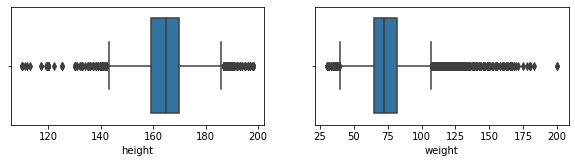

In [15]:
# Handle outlier on height.
X_train = X_train[(X_train['height'] >= 110) & (X_train['height'] <= 200)]
# Hanlde outlier on weight.
X_train = X_train[X_train['weight'] >= 30]
# Display boxplot
plt.figure(figsize=(10,10))
for i, col in enumerate(X_train[['height','weight']]):
    ax = plt.subplot(4,2,i+1)
    sns.boxplot(data = X_train, x=col)
plt.show()

Handle illogical outliers on ubp and lbp column:
- ubp/lbp = there is negative value on blood pressure column which is imposible for human being and accroding to who the way to measure blood pressure consist of two measurement:
  1. Systolic (upper number) = range for normal 120 mmHg - 139 mmHg
  2. Diastolic (lower number) = range for normal 80 mmHg - 89 mmHg
- As there are many values of upb/lbp far from normal range I will take only rows in range : lowest to highest value which is upb(100 - 150) and lbp(60 - 100)
- I believe that negative value on ubp/lbp is the human error on recorded data which is probably by accident put the negative before the number. Hence, I will just transform all value on ubp/lbp column as an absolute value.

In [16]:
# Transform ubl/lbp column value become absolute value.
X_train['ubp'] = X_train['ubp'].abs()
X_train['lbp'] = X_train['lbp'].abs()
print(f"Ubp min : {X_train.describe().T.loc['ubp','min']}")
print(f"Lbp min : {X_train.describe().T.loc['lbp','min']}")

Ubp min : 1.0
Lbp min : 0.0


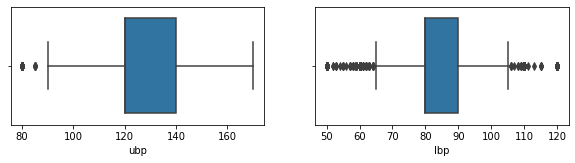

In [17]:
# Handle outlier on ubp.
X_train = X_train[(X_train['ubp'] >= 80) & (X_train['ubp'] <= 170)]
# Handle outlier on lbp.
X_train = X_train[(X_train['lbp'] >= 50) & (X_train['lbp'] <= 120)]
# Display boxplot.
plt.figure(figsize=(10,10))
for i, col in enumerate(X_train[['ubp','lbp']]):
    ax = plt.subplot(4,2,i+1)
    sns.boxplot(data=X_train, x=col)
plt.show()

After removing some outlier, now let's check how many percentage of data already removed and hopely it's not more than 10 percent of original dataset.

In [18]:
removed_data = ((train.shape[0]-X_train.shape[0])/train.shape[0])*100
print(f"We have removed {removed_data} percent data.")
print(f"Total data now is {X_train.shape[0]}.")

We have removed 3.251785714285714 percent data.
Total data now is 54179.


I have removed data with normal percentage, I'll just continue my exploration. Now, I am going to plot categorical column that have been encoded to be numerical.

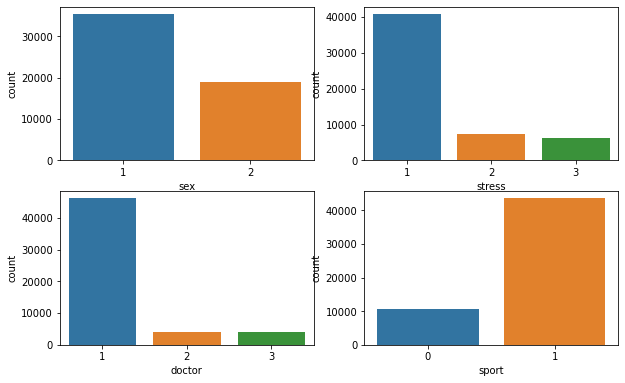

In [19]:
# Display countplot.
plt.figure(figsize=(10,13))
for i, col in enumerate(X_train[['sex','stress','doctor','sport']]):
    ax = plt.subplot(4,2,i+1)
    sns.countplot(data=X_train, x=col)
plt.show()

Insight:
- Most of the participant in this dataset subject are female.
- Only few people have stress level 2 and 3, overall are still on the first level of stress.
- The participant who visited doctor often are infrequently, almost entirely visited doctor once only. 
- However, predominantly the people are active in working out or any kind of sports.

Let's have a look the correlation between features.

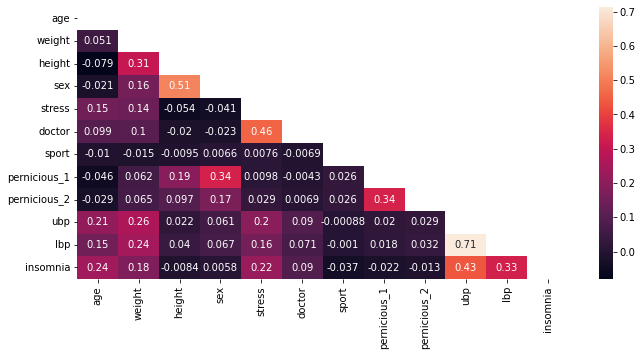

In [20]:
# Display correlation matrix
corr = X_train.corr()
mask = np.triu(corr)
plt.figure(figsize=(11,5))
sns.heatmap(data=corr, annot=True,mask= mask )
plt.show()

I am willing to know what information probably we can get from the features that have high correlation, such as :
- blood pressure and insomnia = 0.31 for lbp and 0.42 for ubp,
- doctore and stress = 0.46,
- sex and height = 0.52,
- weight and height = 0.31.

Eventhough the participant are dominate with female which is two times higher than total of male, but most of the male has bad habit here.

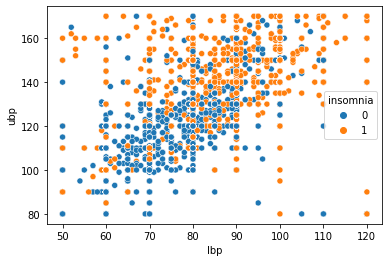

In [21]:
# Blood_pressure and insomnia.
sns.scatterplot(data = X_train, x='lbp', y='ubp', hue='insomnia');

- lbp and ubp have positive correlation.
- If the upper blood pressure increase, it will be followed by the increasing of lower blood pressure aswell.
- The people with high blood pressure most likely will have insomnia problem. And the most influencing factor is the upper blood pressure because even the people with low lbp but high ubp they still tends to have insomia.

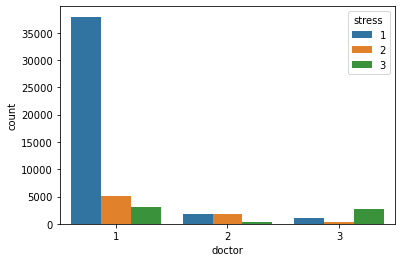

In [22]:
# Doctor and stress.
sns.countplot(data = X_train,x='doctor', hue='stress');

- Most people on the first and second level of stress visit doctor once only.
- People who visit doctor 3 times are those whose stress level is at level 3 followed by the people with stress level at 1 and only few people with stress level 2 come to see doctor 3 times.
- I can conclude that people who has stress problem still rarely visit the doctor.

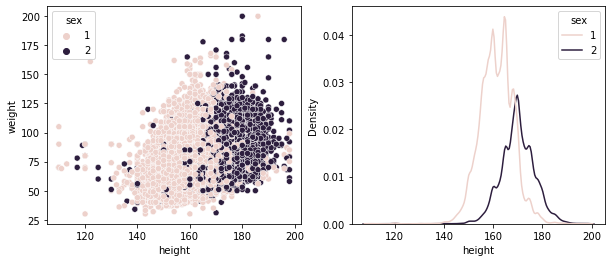

In [23]:
# Sex and height.
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
sns.scatterplot(data = X_train, x='height',y='weight', hue='sex', ax=axs[0]);
sns.kdeplot(data = X_train, x='height', hue='sex', ax = axs[1]);
plt.show();

- Generally, male is taller than female when the shorter male is 10 cm higher than the shortest female.
- The height of average female is around 165 cm when the male is around 170 cm.
- It seem's like the taller a person is the heavier he is.

Now, let's have a look proportion of dataset based on the target value.

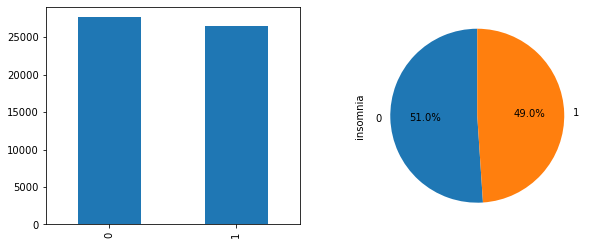

In [24]:
# Display target proportion.
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
X_train['insomnia'].value_counts().plot(kind='bar', ax=axs[0])
X_train['insomnia'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])
plt.show()

There are 51 % data of people with have no insomnia problems and 49 % people have insomnia. This is indicate that this dataset classified as fair dataset.

In [25]:
X_train.to_csv('clean_data.csv', index=False)

### FEATURE ENGINERING

- Create another column description of healthy or not healthy according to BMI value, and blood pressure column description according to ubp and lbp value.
- pernicious_1 and pernicious_2 basically have similar information about someone have bad habit or not. To avoid repetition, combaining this two column into one column without loosing the information will be more efficient.

In [26]:
# Function for bmi description based on data from wikipedia.
def bmi_function(value):
    description = 'healthy'
    if value >= 18.5 and value <= 24.9:
        description = 'healthy'
    elif value >= 25 and value <= 29.9:
        description = 'overweight'
    elif value <= 18.5:
        description = 'underweight'
    elif value >= 30:
        description = 'obese'
    return description

In [27]:
# Function for bp description based on data from wikipedia.
def blood_pressure_description(ubp, lbp):
    description = 'normal'
    if ubp <= 200 and lbp <= 80:
        description = 'normal'
    elif ubp >= 120 and ubp <= 129 and lbp <= 80:
        description = 'elevated'
    elif (ubp >= 30 and ubp <=139) or (lbp >= 80 and lbp <= 89):
        description = 'hypertention_1'
    elif (ubp >= 140 and ubp <=180) or (lbp >= 90 and lbp <= 120):
        description = 'hypertention_2'
    elif ubp > 180 or lbp >= 120:
        description = 'crisis'
    return description

In [28]:

# Create custom transformer for new column.
class NewColumnTransform(TransformerMixin):
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X,y=None,**fit_params):
        # Create BMI column
        bmi = X['weight']/np.square(X['height']/100)
        X['bmi'] = bmi.tolist()
        # Create bmi_description column
        X['bmi_description'] = X.bmi.apply(lambda x: bmi_function(x))
        # Create bp_description column
        X['bp_description'] = X.apply(lambda x: blood_pressure_description(x.ubp, x.lbp), axis=1)
        # Combaining column pernicious_1 and pernicious_2.
        X['bad_habit'] = X['pernicious_1'] + X['pernicious_2']
        X.drop(['pernicious_1','pernicious_2'], axis=1, inplace=True)
        return X

Find features with direct correlation to target column

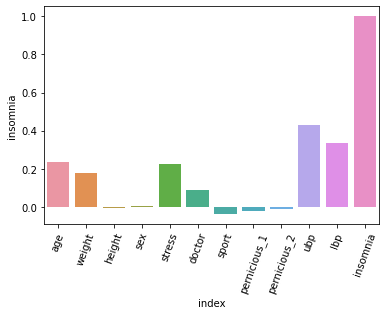

In [29]:
# Display correlation towards target column
corr = X_train.corr()['insomnia'].reset_index()
# corr.drop(labels=8,axis=0,inplace=True)
sns.barplot(data= corr, x='index', y='insomnia',)
plt.xticks(rotation = 70)
plt.show()

I am going to drop columns which have correlation under 0.1 with the target column. For this dataset, as we can see above, sex and sport almost does not have correlation to target column hence I will just drop both. 

In [30]:
# Drop sex and sport column.
X_train.drop(['sex',], axis=1, inplace=True)
X_train.head()

,age,weight,height,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp,insomnia
34948,58.039699,86.0,162,1,1,1,0,0,120,80,0
52464,59.592060,69.0,161,1,1,0,0,0,160,100,1
12615,59.707050,80.0,163,1,1,1,0,0,130,100,1
54265,53.927447,56.0,162,1,1,1,0,0,120,80,0
1134,41.897331,63.0,158,1,1,1,0,1,120,80,0


*Split Data*

In [31]:
X_train_final = X_train.drop('insomnia', axis=1)
y_train_final = X_train.insomnia

In [32]:
X_train_final

,age,weight,height,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp
34948,58.039699,86.0,162,1,1,1,0,0,120,80
52464,59.592060,69.0,161,1,1,0,0,0,160,100
12615,59.707050,80.0,163,1,1,1,0,0,130,100
54265,53.927447,56.0,162,1,1,1,0,0,120,80
1134,41.897331,63.0,158,1,1,1,0,1,120,80
...,...,...,...,...,...,...,...,...,...,...
408,50.239562,70.0,168,2,2,0,0,0,120,80
61218,62.401095,75.0,160,1,2,0,0,0,120,80
22447,55.441478,78.0,158,3,3,1,0,0,120,80
40818,58.061602,89.0,180,1,1,1,1,0,120,80


*Preprocessing*

In [33]:
num_attribute = ['age','ubp','lbp','weight','bmi']
cat_attribute = ['bmi_description', 'bp_description']
tranformer = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribute),
    ('num', MinMaxScaler(),num_attribute),
])

In [34]:
# Create pipeline function.
preprocess = Pipeline([
    ('column_adder', NewColumnTransform()),
    ('column_transform', tranformer),
    ('std_scaler', StandardScaler())
])
prepared_data = preprocess.fit_transform(X_train_final)
prepared_label = y_train_final

### DEFINE, TRAIN, AND EVALUATE MODEL

In [35]:
# Define model with deafult parameter.
logreg = LogisticRegression()
ranfor = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
ganbay = GaussianNB()
adaboost = AdaBoostClassifier()

*Cross Validation Score*

In [36]:
# Here I will create function to display cross validation score of given model.
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [37]:
# Cross validation Logistic Regression
logreg_model = cross_val_score(logreg,prepared_data,prepared_label, cv =5, scoring = 'accuracy')
display_scores(logreg_model)

Scores: [0.71779254 0.71336286 0.71179402 0.71400886 0.71610521]
Mean: 0.7146127003546436
Standard deviation: 0.002107637217956529


In [38]:
# # Cross validation Random Forest Classifier
ranfor_model = cross_val_score(ranfor,prepared_data,prepared_label, cv =5, scoring = 'accuracy')
display_scores(ranfor_model)

Scores: [0.67940199 0.68586194 0.67967885 0.68475452 0.68020305]
Mean: 0.681980070192796
Standard deviation: 0.0027519602975442387


In [39]:
# Cross validation SVC
svc_model = cross_val_score(svc,prepared_data,y_train_final, cv =5, scoring = 'accuracy')
display_scores(svc_model)

In [40]:
# Cross validation KNeighborsClassifier
knn_model = cross_val_score(knn,prepared_data,prepared_label, cv =5, scoring = 'accuracy')
display_scores(knn_model)

Scores: [0.678756   0.6762643  0.67727944 0.68078627 0.68047993]
Mean: 0.6787131871525687
Standard deviation: 0.0017591773998428325


In [41]:
# Cross validation GaussianNB
ganbay = cross_val_score(ganbay,prepared_data,prepared_label, cv =5, scoring = 'accuracy')
display_scores(ganbay)

Scores: [0.67986342 0.6836471  0.6879845  0.68706165 0.68057222]
Mean: 0.6838257765267564
Standard deviation: 0.0032888795147220286


In [42]:
# Cross validation AdaBoostClassifier
adaboost = cross_val_score(adaboost,prepared_data,prepared_label, cv =5, scoring = 'accuracy')
display_scores(adaboost)

Scores: [0.71363972 0.71862311 0.71751569 0.72000738 0.71822796]
Mean: 0.7176027727568278
Standard deviation: 0.0021413768558430023


### HYPERPARAMETER TUNING

In [43]:
parameter = {
    'solver' : ['newton-cg', 'liblinear', 'sag', 'saga'],
    'C' : [0.1,1,0.01,10,100],
    'max_iter' : [100,1000,10000],
    'multi_class' : ['auto','ovr','multinomial'],
}

grid = GridSearchCV(logreg, param_grid = parameter,cv= 5)

In [44]:
# Training model
grid.fit(prepared_data, prepared_label)
# Print out the best params and score
print(f"Best parameter: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameter: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'auto', 'solver': 'sag'}
Best score: 0.7148157307087777


*Create Final Model*

In [45]:
final_model = LogisticRegression(C=0.01, max_iter=10000, multi_class='multinomial', solver='sag')
final_model.fit(prepared_data,prepared_label)

LogisticRegression(C=0.01, max_iter=10000, multi_class='multinomial',
                   solver='sag')

*Final Model Evaluation*

In [46]:
# Predict data test
X_val = X_test.drop(['insomnia','id','sex'], axis=1)
y_val = X_test.insomnia

X_val_scaled = preprocess.transform(X_val)
y_val_predict = final_model.predict(X_val_scaled)
acc_score = accuracy_score(y_val, y_val_predict)

Data test accuracy score: 0.7116428571428571


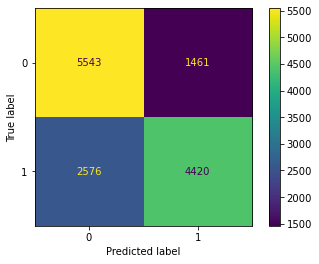

In [47]:
print(f"Data test accuracy score: {acc_score}")
plot_confusion_matrix(final_model, X_val_scaled, y_val)
plt.show()

In [48]:
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      7004
           1       0.75      0.63      0.69      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



### MODEL INFERENCE

#### Loading New Data for Testing

In [49]:
new_data_raw = pd.read_csv("TEST.csv")
new_data = new_data_raw.copy()
new_data = new_data.drop(['id','sex'], axis=1)
new_data.shape

(30000, 10)

In [50]:
new_data.head()

,age,weight,height,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp
0,51.712526,85.0,154,1,1,1.0,0.0,0.0,130,80
1,52.134155,69.0,170,1,1,1.0,NaN,0.0,130,90
2,55.939767,70.0,160,1,1,0.0,0.0,0.0,120,75
3,49.645448,94.0,185,1,1,1.0,NaN,0.0,130,90
4,44.060233,76.0,170,1,1,1.0,0.0,0.0,120,80


*Missing values on new data*

In [51]:
show_general_table(new_data)

    column_name  missing %     type  unique
0           age   0.000000  float64    7244
1        weight   0.000000  float64     203
2        height   0.000000    int64      87
3        stress   0.000000    int64       3
4        doctor   0.000000    int64       3
5         sport   9.656667  float64       2
6  pernicious_1  10.100000  float64       2
7  pernicious_2  10.103333  float64       2
8           ubp   0.000000    int64     134
9           lbp   0.000000    int64     113


show_general_table(df_test)

- We found 3 features with missing points which is sport (9.6% missings), pernicious_1 (10.1% missings), and pernicious_2 (10.1 % missings) column.
- Total and data types of columns are similar to data train except for insomnia column which is not included in this data test.
- Data test consist of 30000 instances with 12 columns/features exclude it's target.

In [52]:
new_data.head()

,age,weight,height,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp
0,51.712526,85.0,154,1,1,1.0,0.0,0.0,130,80
1,52.134155,69.0,170,1,1,1.0,NaN,0.0,130,90
2,55.939767,70.0,160,1,1,0.0,0.0,0.0,120,75
3,49.645448,94.0,185,1,1,1.0,NaN,0.0,130,90
4,44.060233,76.0,170,1,1,1.0,0.0,0.0,120,80


In [53]:
# Fill missing value
new_data.sport.fillna(new_data.sport.mode()[0], inplace=True)
new_data['pernicious_1'].fillna(new_data['pernicious_1'].mode()[0], inplace=True, axis=0)
new_data['pernicious_2'].fillna(new_data['pernicious_2'].mode()[0], inplace=True, axis=0)
new_data.head()


,age,weight,height,stress,doctor,sport,pernicious_1,pernicious_2,ubp,lbp
0,51.712526,85.0,154,1,1,1.0,0.0,0.0,130,80
1,52.134155,69.0,170,1,1,1.0,0.0,0.0,130,90
2,55.939767,70.0,160,1,1,0.0,0.0,0.0,120,75
3,49.645448,94.0,185,1,1,1.0,0.0,0.0,130,90
4,44.060233,76.0,170,1,1,1.0,0.0,0.0,120,80


In [54]:
scaled_new_data = preprocess.transform(new_data)

In [55]:
final_model.predict(scaled_new_data)

array([1, 1, 0, ..., 0, 0, 0])

In [56]:
# Create pipeline for model production
full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocess),
        ("linear", final_model)
    ])


In [57]:
my_model = full_pipeline_with_predictor
joblib.dump(my_model, "my_model.pkl")

### CONCLUSION

***Overall***

- The list of data manipulation done on data training:
  1. Create bmi column based on weight and height,
  2. Create bmi_description column based on bmi value,
  3. Create bp_description column based on ubp and lbp value.
- Handling outlier manually on some columns weight, height, ubp, and lbp by taking only the instances with logical value of each column.
- Total train data removed was 3.3 % and finally remaind 54144 data using on modelling. 
- Data train can be classified as fair or balanced data since the ratio of target class is 51% : 49%.
- Most of the correspondent are female with average age are 53.
- According to data,the most influence factor of people got insomnia was blood pressure, stress problem. Those who have hight blood pressure and stress level more likely will have insomnia problems.

***Model***

- After train some model using this dataset, the highest cross validation score with number of kfold 5 was 0.71 using LinearRegression and AdaboostClassifier when others model like RandomForestClassifier, KNeighborClassifier and GaussianClassifier with only 0.68.
- Commit hyperparameter tuning of LogiticRegression model did not increase score significantly, it is just increase score value around 0.01 either on accuracy score or cross validation score.
- Not only hyperparameter tuning done in order to increase score, adding more features predictor such as bmi, bmi_description, bp_prediction did not give any impact on model.
- Personally, I think that the low of predictor features power are the highest influencing factor of model being not be able to learn optimally. As we know that, blood_pressure is the only highest predictor correlation we have in this dataset which is not enough for model to learn and detect the pattern.
- Therefore, the improvement is visible for this dataset by adding more powerfull predictor features which surely have highly correlated to predict someone insomnia problem or by better understanding on each model algorith for doing tuning hyperparameter of each possible model.

*Note: I have submitted this notebook on [kaggle](https://www.kaggle.com/c/idao-2022-bootcamp-insomnia/leaderboard) competition and got score of 0.65.*  
